In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-09 18:40:14--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  39.3MB/s   in 1.8s   

2020-10-09 18:40:16 (39.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('Data-Collisions.csv', low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
list(df.columns.values)

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df.groupby(['ROADCOND','LIGHTCOND','SPEEDING','ST_COLCODE'])['SEVERITYCODE'].value_counts()

ROADCOND  LIGHTCOND                 SPEEDING  ST_COLCODE  SEVERITYCODE
Dry       Dark - No Street Lights   Y         10          2                 1
                                              11          1                 1
                                              13          2                 1
                                              14          2                 3
                                                          1                 2
                                              23          1                 1
                                              32          1                 9
                                                          2                 4
                                              50          1                17
                                                          2                11
                                              52          2                 3
          Dark - Street Lights Off  Y         10          1            

In [8]:
df_accident = df[['OBJECTID','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','SDOT_COLCODE','INATTENTIONIND',
             'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']].copy(deep=True)

In [9]:
df_accident.dtypes

OBJECTID           int64
ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
SDOT_COLCODE       int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
dtype: object

In [10]:
#Convert time into correct format
df_accident['INCDTTM'] = pd.to_datetime(df_accident['INCDTTM'])
df_accident['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
5        2019-04-20 17:42:00
6        2008-12-09 00:00:00
7        2020-04-15 17:47:00
8        2006-06-15 13:00:00
9        2006-03-20 15:49:00
10       2006-05-25 18:20:00
11       2005-08-11 17:30:00
12       2006-05-17 12:51:00
13       2005-12-22 17:13:00
14       2013-03-31 02:09:00
15       2020-04-20 00:00:00
16       2005-07-01 00:00:00
17       2004-01-16 08:25:00
18       2020-04-17 14:44:00
19       2009-06-01 00:00:00
20       2013-03-27 20:45:00
21       2013-03-28 16:22:00
22       2008-07-18 22:02:00
23       2004-09-12 06:20:00
24       2013-03-31 10:05:00
25       2019-04-25 09:40:00
26       2010-11-13 15:24:00
27       2007-07-23 16:30:00
28       2013-03-25 14:42:00
29       2006-11-16 11:00:00
                 ...        
194643   2018-11-17 23:06:00
194644   2019-01-17 17:11:00
194645   2018-10-20 02:07:00
194646   2018-

In [11]:
#Check for null values
df_accident.isnull().sum()

OBJECTID               0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
dtype: int64

In [12]:
#Check data for NaN values
df_accident.describe(include='all')

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
count,194673.000000,192747,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673.000000,29805,189789,189592,189661,189503,4667,9333,194655
unique,NaN,3,NaN,NaN,NaN,NaN,162058,NaN,1,4,11,9,9,1,1,63
top,NaN,Block,NaN,NaN,NaN,NaN,2006-11-02 00:00:00,NaN,Y,N,Clear,Dry,Daylight,Y,Y,32
freq,NaN,126926,NaN,NaN,NaN,NaN,96,NaN,29805,100274,111135,124510,116137,4667,9333,44421
first,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,108479.364930,NaN,2.444427,0.037139,0.028391,1.920780,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,62649.722558,NaN,1.345929,0.198150,0.167413,0.631047,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,54267.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Convert NaN to 0
df_accident['INATTENTIONIND']=df_accident['INATTENTIONIND'].fillna(0)
df_accident['SPEEDING']=df_accident['SPEEDING'].fillna(0)
df_accident['PEDROWNOTGRNT']=df_accident['PEDROWNOTGRNT'].fillna(0)

In [14]:
#Replace other NaN values with value most frequent
df_accident['ADDRTYPE'] = df_accident['ADDRTYPE'].fillna(df_accident['ADDRTYPE'].mode().iloc[0])
df_accident['UNDERINFL'] = df_accident['UNDERINFL'].fillna(df_accident['UNDERINFL'].mode().iloc[0])
df_accident['WEATHER'] = df_accident['WEATHER'].fillna(df_accident['WEATHER'].mode().iloc[0])
df_accident['ROADCOND'] = df_accident['ROADCOND'].fillna(df_accident['ROADCOND'].mode().iloc[0])
df_accident['LIGHTCOND'] = df_accident['LIGHTCOND'].fillna(df_accident['LIGHTCOND'].mode().iloc[0])
df_accident['ST_COLCODE'] = df_accident['ST_COLCODE'].fillna(df_accident['ST_COLCODE'].mode().iloc[0])

In [15]:
#Check data for NaN values
df_accident.isnull().sum()

OBJECTID          0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
dtype: int64

In [16]:
#Check types of data are same
df_accident.dtypes

OBJECTID                   int64
ADDRTYPE                  object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
ST_COLCODE                object
dtype: object

In [17]:
#Change data to numberical
df_accident['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
df_accident['INATTENTIONIND'].replace(to_replace=['NaN','Y'], value=[0,1],inplace=True)
df_accident['UNDERINFL'].replace(to_replace=['N','0','Y','1'], value=[0,0,1,1],inplace=True)
df_accident['UNDERINFL']=df_accident['UNDERINFL'].astype(dtype='int64')
df_accident['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

In [18]:
df_accident['SEVERITYCODE'] = df['SEVERITYCODE'].copy(deep=True)

In [19]:
df_accident['HOUR'] = df_accident['INCDTTM'].dt.hour

In [20]:
df_accident.groupby(['HOUR'])['SEVERITYCODE'].value_counts().head()

HOUR  SEVERITYCODE
0     1               25129
      2                9252
1     1                2577
      2                 831
2     1                2736
Name: SEVERITYCODE, dtype: int64

SEVERITYCODE
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HOUR, dtype: object

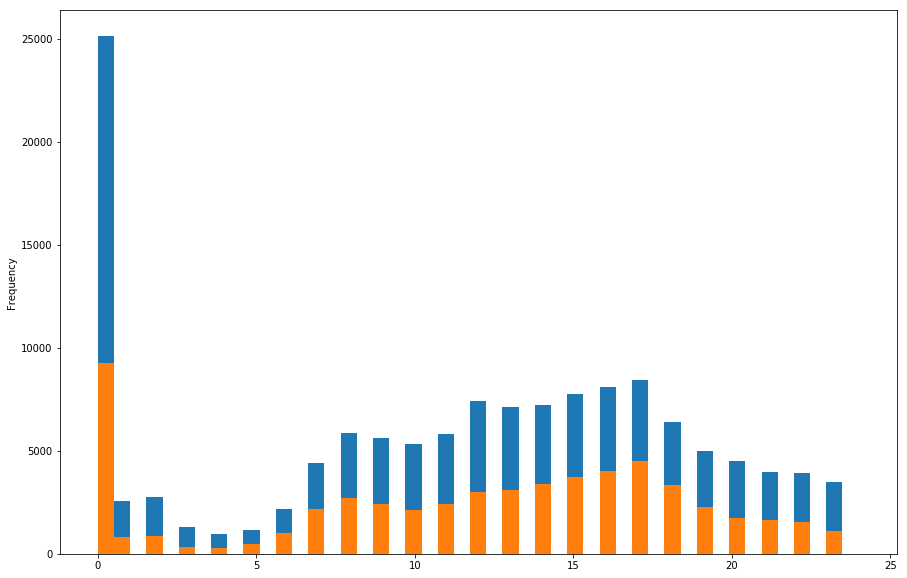

In [21]:
df_accident.groupby('SEVERITYCODE')['HOUR'].plot(kind='hist',bins=np.linspace(0,24,48), figsize=(15,10))

In [22]:
lights = df_accident['LIGHTCOND'].value_counts().keys().to_list()
df_accident['LIGHTCOND'].replace(to_replace=lights, value=list(range(len(lights))), inplace=True)

roads = df_accident['ROADCOND'].value_counts().keys().to_list()
df_accident['ROADCOND'].replace(to_replace=roads, value=list(range(len(roads))), inplace=True)

weather = df_accident['WEATHER'].value_counts().keys().to_list()
df_accident['WEATHER'].replace(to_replace=weather, value=list(range(len(weather))), inplace=True)

In [23]:
df_accident.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                    int64
ROADCOND                   int64
LIGHTCOND                  int64
PEDROWNOTGRNT             object
SPEEDING                   int64
ST_COLCODE                object
SEVERITYCODE               int64
HOUR                       int64
dtype: object

In [24]:
df_accident['ST_COLCODE'].replace(to_replace=[' '], value=[-1],inplace=True)
df_accident['ST_COLCODE'] = df_accident['ST_COLCODE'].astype('int64', inplace=True)

In [25]:
df_accident.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                    int64
ROADCOND                   int64
LIGHTCOND                  int64
PEDROWNOTGRNT             object
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
HOUR                       int64
dtype: object

In [26]:
features= df_accident[['WEATHER','ROADCOND','LIGHTCOND','PERSONCOUNT','ST_COLCODE','SDOT_COLCODE','INATTENTIONIND',
                 'UNDERINFL','SPEEDING',]].copy(deep=True)

In [27]:
features.head()

,WEATHER,ROADCOND,LIGHTCOND,PERSONCOUNT,ST_COLCODE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING
0,2,1,0,2,10,11,0,0,0
1,1,1,1,2,11,16,0,0,0
2,2,0,0,4,32,14,0,0,0
3,0,0,0,3,23,11,0,0,0
4,1,1,0,2,10,11,0,0,0


In [28]:
y = df_accident['SEVERITYCODE']

### Normalize Data

In [29]:
from sklearn import preprocessing

In [30]:
X = features
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (155738, 9) (155738,)
Test set: (38935, 9) (38935,)


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(criterion="entropy")
dt = DecisionTreeClassifier(criterion="entropy")

In [35]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
yhat= dt.predict(x_test)

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_ = f1_score(y_test,yhat)

In [39]:
print(f1_)

0.8349687180261327


In [40]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
print(f1_score(y[200:20000],dt.predict(X[200:20000])))

0.8516112008971273
